In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 6s 0us/step


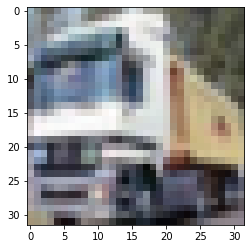

In [ ]:
plt.imshow(x_train[1])
plt.show()

In [ ]:
learning_rate = 0.005
dropout_1 = 0.1
dropout_2 = 0.1
batch_size = 128

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

epochs = 10
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_test, y_test))

Epoch 1/10
391/391 [==============================] - 2s 6ms/step - loss: 1.6402 - accuracy: 0.3881 - val_loss: 1.3457 - val_accuracy: 0.5125
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.2932 - accuracy: 0.5349 - val_loss: 1.2298 - val_accuracy: 0.5578
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1872 - accuracy: 0.5738 - val_loss: 1.2021 - val_accuracy: 0.5729
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1230 - accuracy: 0.6011 - val_loss: 1.0807 - val_accuracy: 0.6188
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0703 - accuracy: 0.6211 - val_loss: 1.0520 - val_accuracy: 0.6224
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0294 - accuracy: 0.6353 - val_loss: 1.0149 - val_accuracy: 0.6387
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0131 - accuracy: 0.6425 - val_loss: 1.0023 - val_accuracy: 0.6497
Epoch 

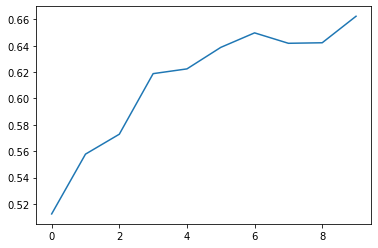

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.show()